### 1. Benchmarking Regression - Bike Sharing Demand

In [1]:
# !pip install pycaret

Dataset 1- Bike Share Demand

In [2]:
import pandas as pd

bike_demand = pd.read_csv(
    "C:\\Users\\himan\\OneDrive\\Documents\\Study Docs\\Python VS Code\\ML From Scratch\\Datasets\\bike-sharing-demand\\train.csv"
)
bike_demand = bike_demand.drop(columns=["datetime"])

from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
bike_demand_train, bike_demand_test = train_test_split(
    bike_demand, test_size=0.001, random_state=24, shuffle=True
)

In [3]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler


def normalize_data(train_data, test_data, columns_to_normalize):
    """
    Normalize the specified columns in the training and test data using StandardScaler.

    Parameters:
    - train_data (pd.DataFrame): Training data
    - test_data (pd.DataFrame): Test data
    - columns_to_normalize (list): List of column names to normalize

    Returns:
    - normalized_train_data (pd.DataFrame): Normalized training data
    - normalized_test_data (pd.DataFrame): Normalized test data
    """
    # Create the transformer
    scaler = ColumnTransformer(
        transformers=[("num", StandardScaler(), columns_to_normalize)],
        remainder="passthrough",  # Keep the other columns unchanged
    )

    # Fit and transform the training data
    normalized_train_data = pd.DataFrame(
        scaler.fit_transform(train_data), columns=train_data.columns
    )

    # Transform the test data
    normalized_test_data = pd.DataFrame(
        scaler.transform(test_data), columns=test_data.columns
    )

    # Match the original data types
    for col in train_data.columns:
        normalized_train_data[col] = normalized_train_data[col].astype(
            train_data[col].dtype
        )
        normalized_test_data[col] = normalized_test_data[col].astype(
            train_data[col].dtype
        )

    return normalized_train_data, normalized_test_data


columns_to_normalize = [
    "temp",
    "atemp",
    "humidity",
    "windspeed",
    "casual",
    "registered",
]
bike_demand_train_normalized, bike_demand_test_normalized = normalize_data(
    bike_demand_train, bike_demand_test, columns_to_normalize
)

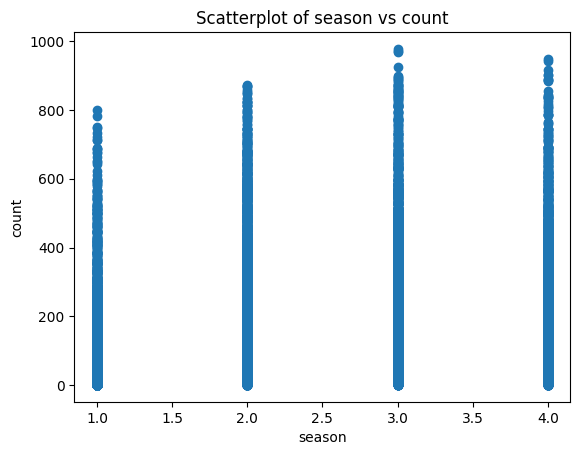

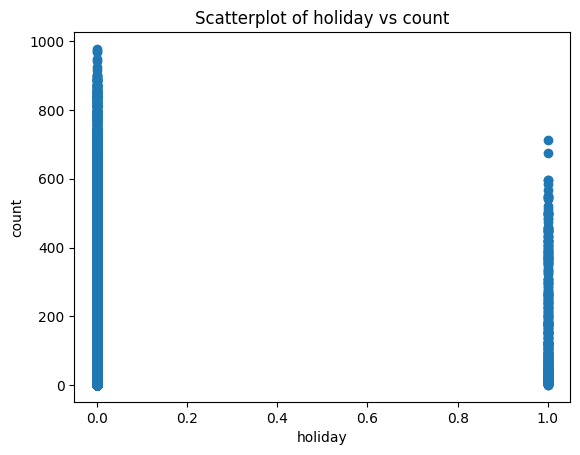

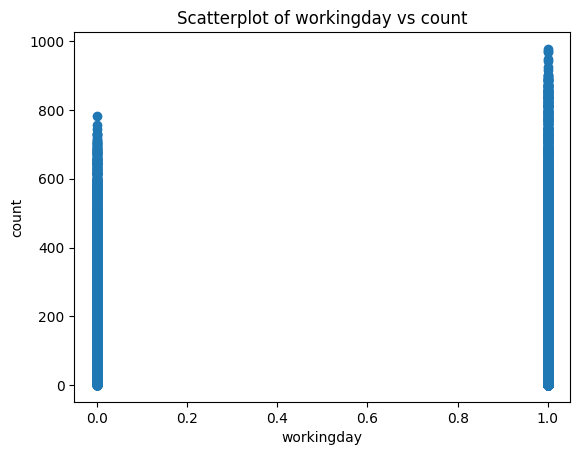

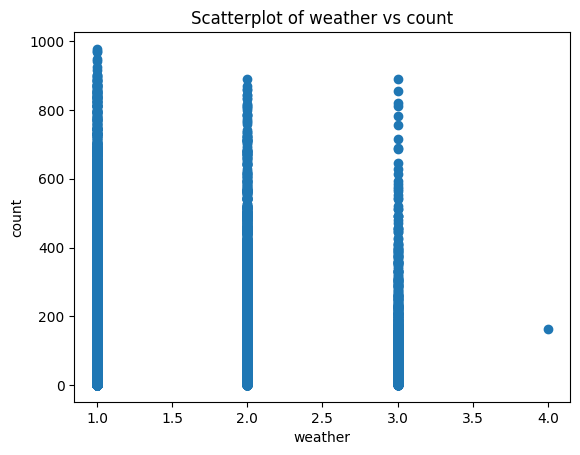

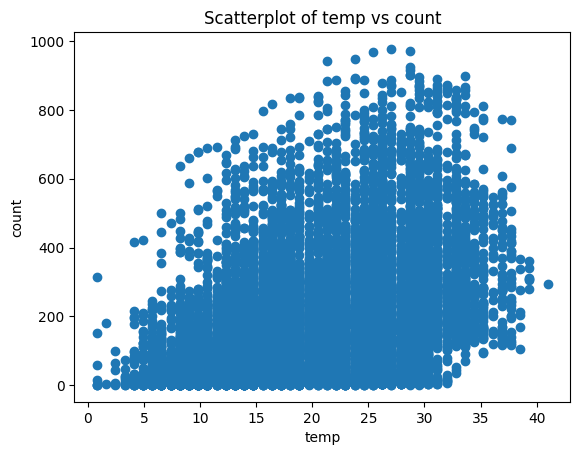

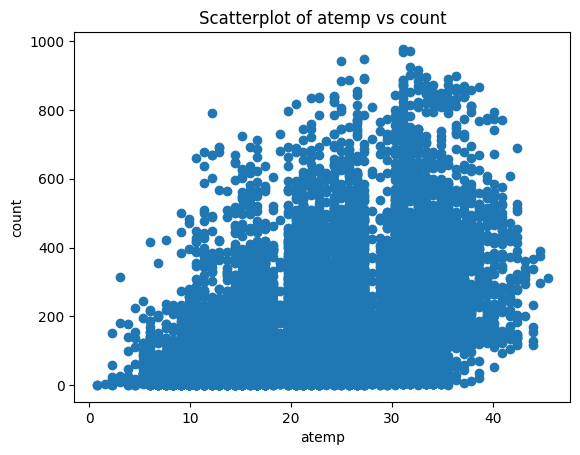

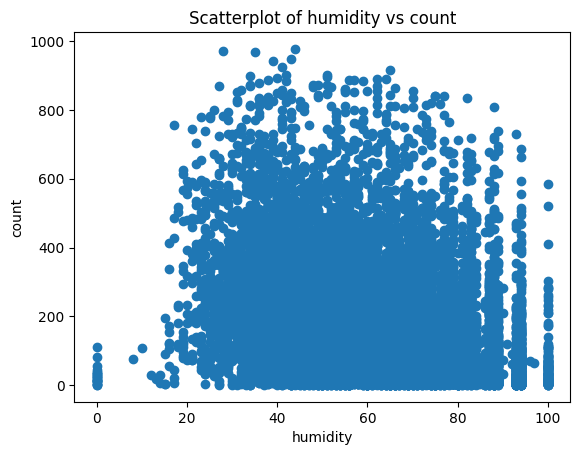

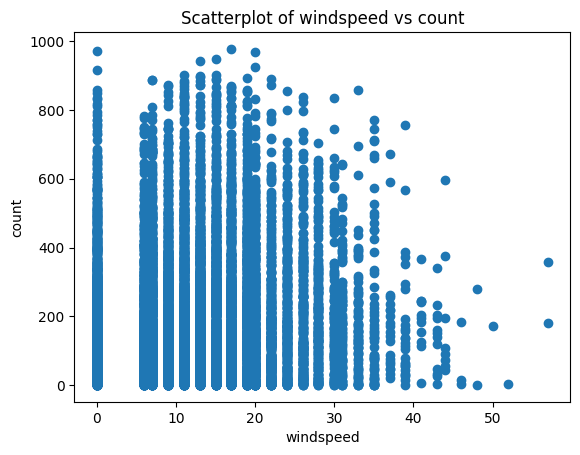

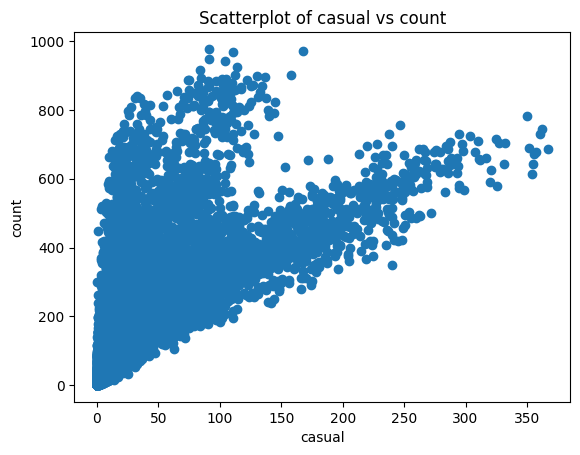

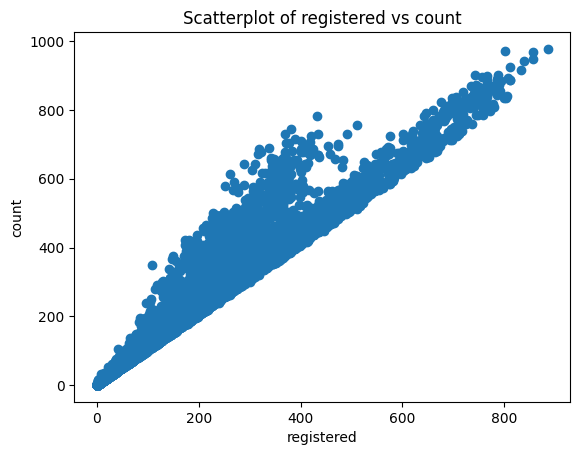

In [4]:
import matplotlib.pyplot as plt

# Assuming bike_demand_train is your pandas DataFrame
for col in bike_demand_train.columns:
    if col != "count":
        plt.scatter(bike_demand_train[col], bike_demand_train["count"])
        plt.xlabel(col)
        plt.ylabel("count")
        plt.title(f"Scatterplot of {col} vs count")
        plt.show()

Dataset 2- KC House 

In [5]:
kc_house = pd.read_csv(
    "C:\\Users\\himan\\OneDrive\\Documents\\Study Docs\\Python VS Code\\ML From Scratch\\Datasets\\kc_house_data_regression.csv"
)

kc_house = kc_house[
    [
        "bedrooms",
        "bathrooms",
        "sqft_living",
        "sqft_lot",
        "condition",
        "grade",
        "floors",
        "price",
    ]
]

# Split the data into training and testing sets
kc_house_train, kc_house_test = train_test_split(
    kc_house, test_size=0.2, random_state=24, shuffle=True
)


# kc_house[kc_house.isna().any(axis=1)]

columns_to_normalize = [
    "bedrooms",
    "bathrooms",
    "sqft_living",
    "sqft_lot",
    "condition",
    "grade",
    "floors",
]
kc_house_train_normalized, kc_house_test_normalized = normalize_data(
    kc_house_train, kc_house_test, columns_to_normalize
)

kc_house_train_normalized

,bedrooms,bathrooms,sqft_living,sqft_lot,condition,grade,floors,price
0,0,0.504159,0,0,0,2,0.949426,717000.0
1,0,1.154335,0,0,0,0,-0.909538,265000.0
2,-1,-1.446368,-1,0,0,-2,-0.909538,83000.0
3,0,-1.446368,-1,0,0,0,-0.909538,390000.0
4,0,0.504159,0,0,0,0,0.949426,575000.0
...,...,...,...,...,...,...,...,...
17285,0,1.479423,1,0,0,2,0.949426,755000.0
17286,0,0.504159,1,0,0,1,0.949426,435000.0
17287,1,0.829247,0,0,0,0,-0.909538,294000.0
17288,0,-0.471105,0,0,0,0,-0.909538,291500.0


In [6]:
from pycaret.regression import RegressionExperiment

# Create an instance of RegressionExperiment
exp = RegressionExperiment()

# Set up the regression environment
exp.setup(data=kc_house_train_normalized, target="price", session_id=123)

# Compare all models and select the best one
best_model = exp.compare_models()

# Evaluate the best model on the test set
predictions = exp.predict_model(best_model, data=kc_house_test_normalized)

# Display the results
print(predictions)

,Description,Value
0,Session id,123
1,Target,price
2,Target type,Regression
3,Original data shape,"(17290, 8)"
4,Transformed data shape,"(17290, 8)"
5,Transformed train set shape,"(12103, 8)"
6,Transformed test set shape,"(5187, 8)"
7,Numeric features,7
8,Preprocess,True
9,Imputation type,simple


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,152210.6480,54134730454.5847,231822.3269,0.5701,0.3657,0.3236,0.0710
lightgbm,Light Gradient Boosting Machine,151991.5312,54566333232.6337,232778.0502,0.5661,0.3635,0.3199,0.3380
xgboost,Extreme Gradient Boosting,153292.7578,57310725324.8000,238590.0125,0.5445,0.3665,0.3211,0.0370
rf,Random Forest Regressor,154842.6836,57233596871.8193,238502.9852,0.5444,0.3694,0.3241,0.1170
et,Extra Trees Regressor,156445.3333,59057027970.0390,242447.6346,0.5282,0.3728,0.3258,0.1200
lar,Least Angle Regression,170236.2672,61793772339.2000,247786.0281,0.5091,0.4700,0.3790,0.0140
br,Bayesian Ridge,170211.3594,61792720896.0000,247783.0516,0.5091,0.4698,0.3789,0.0130
llar,Lasso Least Angle Regression,170236.0156,61793732198.4000,247785.9484,0.5091,0.4700,0.3790,0.0110
ridge,Ridge Regression,170232.2188,61793581465.6000,247785.5078,0.5091,0.4699,0.3790,0.0130
lasso,Lasso Regression,170236.0484,61793735475.2000,247785.9516,0.5091,0.4700,0.3790,0.4410


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,153658.6754,57680908108.8694,240168.4994,0.6119,0.3629,0.3200


      bedrooms  bathrooms  sqft_living  sqft_lot  condition  grade    floors  \
0            0   0.829247            0         0          0      0  0.019944   
1            0   0.504159            0         0          0      0 -0.909538   
2            0  -0.471105            0         0          0      0 -0.909538   
3            1   2.129598            2         0          0      0  0.949426   
4            0  -0.471105           -1         0          0     -1 -0.909538   
...        ...        ...          ...       ...        ...    ...       ...   
4318         0  -1.446368            0         0          0      0  0.949426   
4319         0   0.179071            0         0          0      0  0.949426   
4320         0  -0.146017            0         0          0      0  0.949426   
4321         0   0.504159            0         0          0      0  0.949426   
4322         0  -0.471105            0         5          0      0 -0.909538   

          price  prediction_label  
0  

In [7]:
exp.evaluate_model(best_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [8]:
kc_house_train_normalized

,bedrooms,bathrooms,sqft_living,sqft_lot,condition,grade,floors,price
0,0,0.504159,0,0,0,2,0.949426,717000.0
1,0,1.154335,0,0,0,0,-0.909538,265000.0
2,-1,-1.446368,-1,0,0,-2,-0.909538,83000.0
3,0,-1.446368,-1,0,0,0,-0.909538,390000.0
4,0,0.504159,0,0,0,0,0.949426,575000.0
...,...,...,...,...,...,...,...,...
17285,0,1.479423,1,0,0,2,0.949426,755000.0
17286,0,0.504159,1,0,0,1,0.949426,435000.0
17287,1,0.829247,0,0,0,0,-0.909538,294000.0
17288,0,-0.471105,0,0,0,0,-0.909538,291500.0
